# Importing Dependencies

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




# Reading the Data

In [46]:
df = pd.read_csv("dataFiles/HINDUNILVR_cleaned.csv")

# Basic Data Cleaning

In [47]:
df = df[['Date','Open','Close']]
df['Date'] = pd.to_datetime(df['Date'], utc = True)
df.info()
df['IntradayReturn'] = np.log(df['Close'] / df['Open'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7384 entries, 0 to 7383
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Date    7384 non-null   datetime64[ns, UTC]
 1   Open    7384 non-null   float64            
 2   Close   7384 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(2)
memory usage: 173.2 KB


In [48]:
# df = df.set_index('Date')
print(df.head())

# df.dropna(inplace=True)
# df.shape

                       Date       Open      Close  IntradayReturn
0 1995-12-31 18:30:00+00:00  34.845124  34.623840       -0.006371
1 1996-01-01 18:30:00+00:00  34.623829  34.993568        0.010622
2 1996-01-02 18:30:00+00:00  34.993582  34.786304       -0.005941
3 1996-01-03 18:30:00+00:00  34.733077  34.789097        0.001612
4 1996-01-04 18:30:00+00:00  34.789098  34.733078       -0.001612


# Calculating Return

In [49]:
df['LogClose'] = np.log(df['Close']) 
df['DailyReturn'] = df['Close'] / df['Close'].shift(1) - 1
df['Return'] =  df['Close'] - df['Open'] 
# df['LogReturn'] = np.log(df['Return']) 

df.head()
df3 = df.tail(6000)

In [50]:
# df2 = df2.set_index('Date')
# df3 = df2.resample('ME').last()
# df3 = df2

In [51]:
df3.head()

,Date,Open,Close,IntradayReturn,LogClose,DailyReturn,Return
1384,2001-04-19 18:30:00+00:00,126.263240,128.343216,0.016339,4.854708,0.023837,2.079976
1385,2001-04-22 18:30:00+00:00,127.435062,129.075607,0.012791,4.860398,0.005707,1.640545
1386,2001-04-23 18:30:00+00:00,128.313947,125.999611,-0.018201,4.836279,-0.023831,-2.314337
1387,2001-04-24 18:30:00+00:00,126.116770,125.120728,-0.007929,4.829279,-0.006975,-0.996042
1388,2001-04-25 18:30:00+00:00,125.384407,122.454865,-0.023642,4.807743,-0.021306,-2.929542


In [52]:
df3.tail()

,Date,Open,Close,IntradayReturn,LogClose,DailyReturn,Return
7379,2025-05-21 18:30:00+00:00,2355.000000,2330.699951,-0.010372,7.753924,-0.014045,-24.300049
7380,2025-05-22 18:30:00+00:00,2336.899902,2359.199951,0.009497,7.766078,0.012228,22.300049
7381,2025-05-25 18:30:00+00:00,2368.000000,2394.100098,0.010962,7.780763,0.014793,26.100098
7382,2025-05-26 18:30:00+00:00,2394.100098,2380.199951,-0.005823,7.774940,-0.005806,-13.900146
7383,2025-05-27 18:30:00+00:00,2388.000000,2362.000000,-0.010947,7.767264,-0.007646,-26.000000


# Plots over time


<Axes: xlabel='Date', ylabel='Return'>

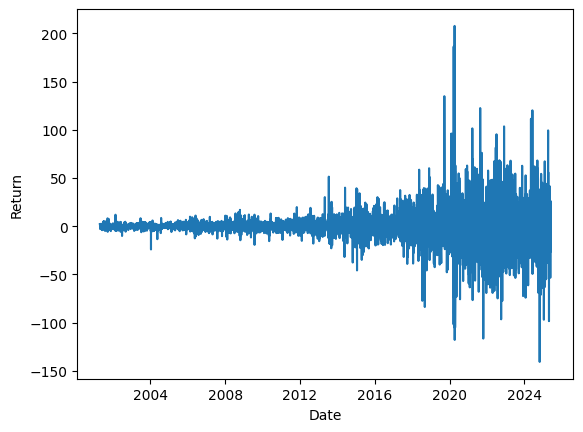

In [53]:
sns.lineplot(data = df3, x = "Date", y = "Return")

<Axes: xlabel='Date', ylabel='Return'>

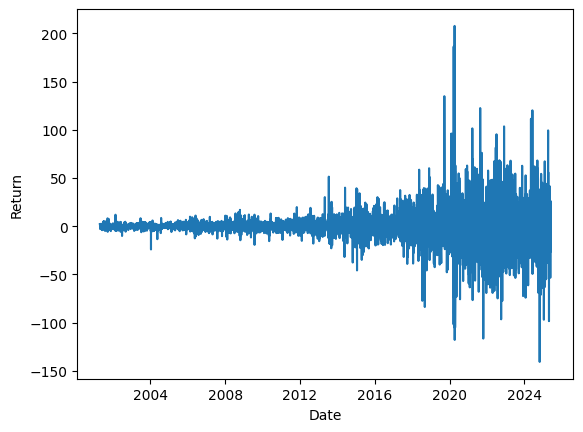

In [54]:
sns.lineplot(data = df3, x = "Date", y = "Return")

<Axes: xlabel='Date', ylabel='IntradayReturn'>

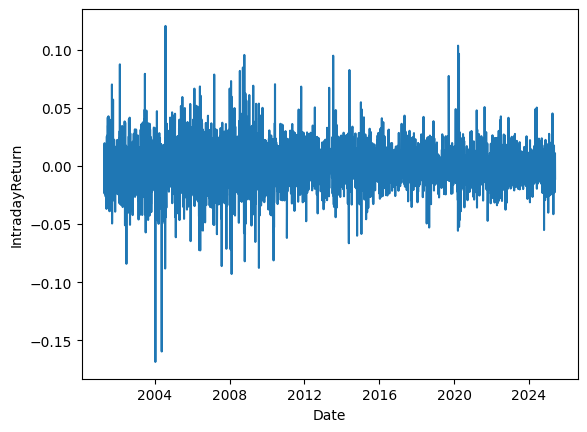

In [55]:
sns.lineplot(data=df3, x="Date", y="IntradayReturn")

<Axes: xlabel='Date', ylabel='Close'>

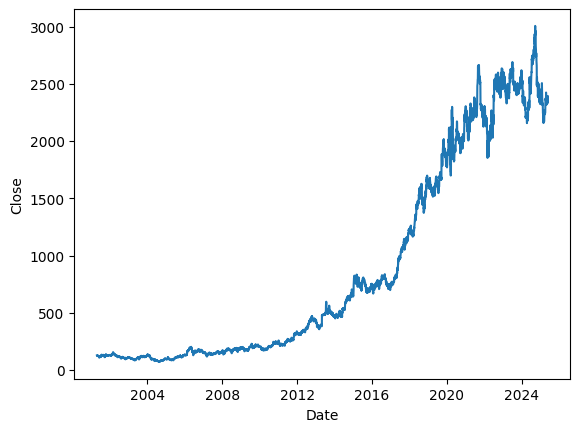

In [56]:
sns.lineplot(data=df3, x="Date", y="Close")

<Axes: xlabel='Date', ylabel='LogClose'>

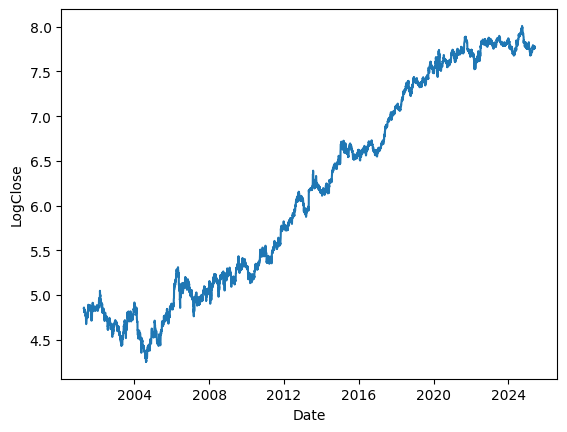

In [57]:
sns.lineplot(data=df3, x="Date", y="LogClose")

# ACF and PACF

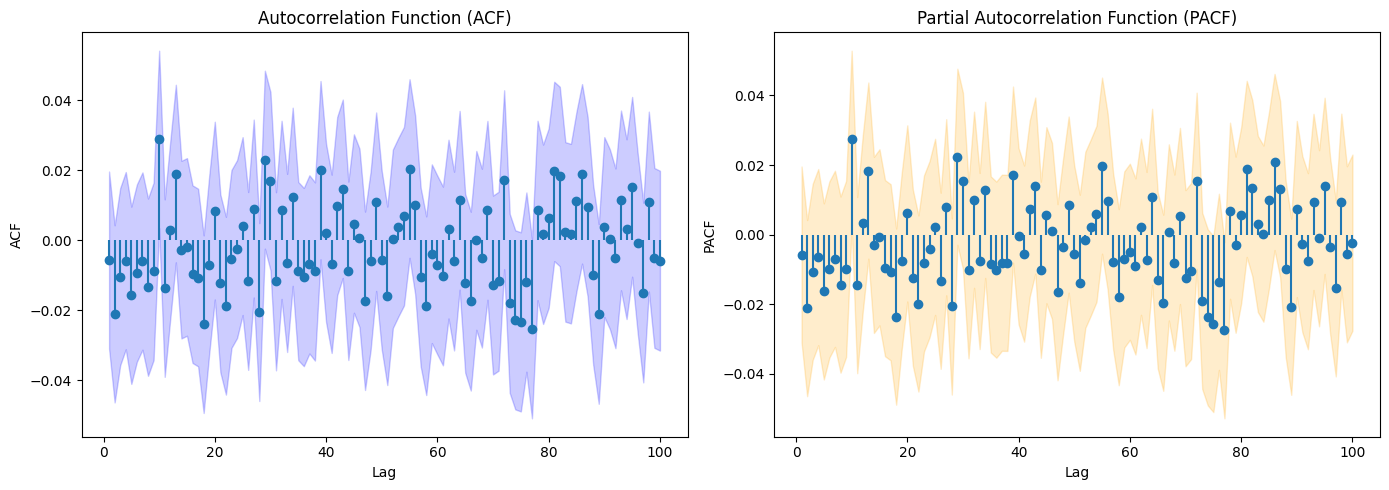

In [58]:
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
import numpy as np

# Series without NaNs
series = df3['DailyReturn'].dropna()

# Compute ACF and PACF with confidence intervals
acf_vals, acf_confint = acf(series, nlags=100, alpha=0.05)  # 95% CI
pacf_vals, pacf_confint = pacf(series, nlags=100, method='ywm', alpha=0.05)

# Exclude lag 0
lags = np.arange(1, 101)
acf_vals = acf_vals[1:]
acf_confint = acf_confint[1:]
pacf_vals = pacf_vals[1:]
pacf_confint = pacf_confint[1:]

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ACF plot
axes[0].stem(lags, acf_vals, basefmt=" ")
axes[0].fill_between(lags, acf_confint[:, 0] - acf_vals + acf_vals, acf_confint[:, 1] - acf_vals + acf_vals, 
                     color='blue', alpha=0.2)
axes[0].set_title('Autocorrelation Function (ACF)')
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('ACF')

# PACF plot
axes[1].stem(lags, pacf_vals, basefmt=" ")
axes[1].fill_between(lags, pacf_confint[:, 0] - pacf_vals + pacf_vals, pacf_confint[:, 1] - pacf_vals + pacf_vals, 
                     color='orange', alpha=0.2)
axes[1].set_title('Partial Autocorrelation Function (PACF)')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('PACF')

plt.tight_layout()
plt.show()


# Augmented Dickey Fuller

In [59]:
from statsmodels.tsa.stattools import adfuller

# Assuming df['Close'] contains your time series
result = adfuller(df['Close'].dropna())

# Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Used lags:', result[2])
print('Number of observations:', result[3])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: 0.42298147350218557
p-value: 0.9823343184504995
Used lags: 33
Number of observations: 7350
Critical Values:
   1%: -3.431240011602706
   5%: -2.861933316570829
   10%: -2.566979358119302


In [60]:
from statsmodels.tsa.stattools import adfuller

# Assuming df['Close'] contains your time series
result = adfuller(df['IntradayReturn'].dropna())

# Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Used lags:', result[2])
print('Number of observations:', result[3])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -20.757933839421188
p-value: 0.0
Used lags: 14
Number of observations: 7369
Critical Values:
   1%: -3.4312377160244014
   5%: -2.861932302253562
   10%: -2.566978818183129


The p-value is 0.0 (much less than 0.05).
Thus series is stationary.

In [61]:
from statsmodels.tsa.stattools import adfuller

# Assuming df['Close'] contains your time series
result = adfuller(df['Return'].dropna())

# Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Used lags:', result[2])
print('Number of observations:', result[3])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -14.581925017289008
p-value: 4.454265118798569e-27
Used lags: 36
Number of observations: 7347
Critical Values:
   1%: -3.4312403751481746
   5%: -2.861933477205856
   10%: -2.566979443627729


In [62]:
from statsmodels.tsa.stattools import adfuller

# Assuming df['Close'] contains your time series
result = adfuller(df['DailyReturn'].dropna())

# Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Used lags:', result[2])
print('Number of observations:', result[3])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -16.234991404889925
p-value: 3.777866335578606e-29
Used lags: 29
Number of observations: 7353
Critical Values:
   1%: -3.4312396483539924
   5%: -2.8619331560669066
   10%: -2.566979272680667


# RNN

In [63]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

train = df3['DailyReturn']

# Example: assuming `train` is a Pandas Series
series = train.dropna().values.reshape(-1, 1)

# Scale data to [0,1]
scaler = MinMaxScaler()
scaled_series = scaler.fit_transform(series)

# Convert to sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 10
X, y = create_sequences(scaled_series, window_size)

# Train-test split
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(window_size, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()


history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test), verbose=1)


/Users/ankuryadav/Downloads/data-iitm/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0079 - val_loss: 0.0018
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0034 - val_loss: 0.0016
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0034 - val_loss: 0.0016
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0034 - val_loss: 0.0016
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.0032 - val_loss: 0.0019
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - loss: 0.0033 - val_loss: 0.0017
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 0.0034 - val_loss: 0.0019
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0031 - val_loss: 0.0016
Epoch 9/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0032 - val_loss: 0.0017
Epoch 10/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0032 - val_loss: 0.0015
Epoch 11/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 0.0032 - val_loss: 0.0020
Epoch 12/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
RMSE: 0.0143
MAE: 0.0109
Directional Accuracy: 51.00%


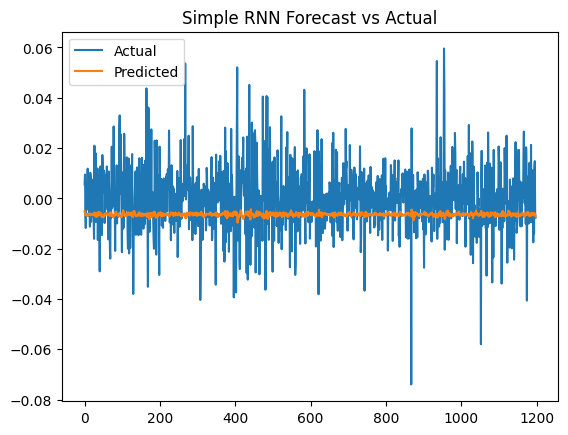

In [ ]:
# Predict
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_orig = scaler.inverse_transform(y_test)

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred))
mae = mean_absolute_error(y_test_orig, y_pred)
directional_accuracy = (np.sign(y_test_orig.flatten()) == np.sign(y_pred.flatten())).mean()

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"Directional Accuracy: {directional_accuracy:.2%}")

y_actual = y_test_orig


import matplotlib.pyplot as plt

plt.plot(y_test_orig, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("Simple RNN Forecast vs Actual")
plt.show()


# GARCH


🔍 Best GARCH order: p=1, q=3 (AIC=-26330.75)

📊 Error Metrics:
MAE  = 0.009135
MSE  = 0.000120
RMSE = 0.010940


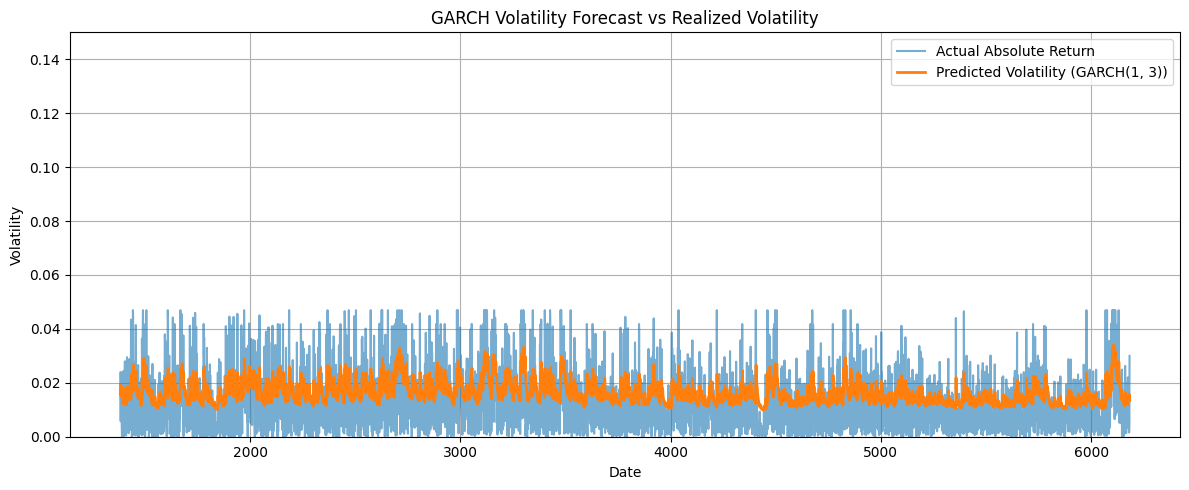

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# If needed
# df3['Date'] = pd.to_datetime(df3['Date'])
# df3.set_index('Date', inplace=True)
returns = df3['DailyReturn'].dropna()

returns = returns.clip(lower=returns.quantile(0.01), upper=returns.quantile(0.99))

# Train-test split
split_ratio = 0.8
split_index = int(len(returns) * split_ratio)
train, test = returns[:split_index], returns[split_index:]




# Auto-tune GARCH order (on train set)
best_aic = np.inf
best_order = (1, 1)

for p in range(1, 4):
    for q in range(1, 4):
        try:
            model = arch_model(train, p=p, q=q)
            result = model.fit(disp='off')
            if result.aic < best_aic:
                best_aic = result.aic
                best_order = (p, q)
        except:
            continue

print(f"\n🔍 Best GARCH order: p={best_order[0]}, q={best_order[1]} (AIC={best_aic:.2f})")

# Rolling forecast
predicted_vol = []
history = train.copy()

for t in range(len(train)):
    model = arch_model(history, p=best_order[0], q=best_order[1])
    model_fit = model.fit(disp='off')
    forecast = model_fit.forecast(horizon=1)
    vol = np.sqrt(forecast.variance.values[-1, 0])
    predicted_vol.append(vol)

    new_point = pd.Series(train.iloc[t], index=[train.index[t]])
    history = pd.concat([history, new_point])

predicted_vol_series = pd.Series(predicted_vol, index=train.index)

# Step 5: Error metrics
realized_vol = np.abs(train)

mae = mean_absolute_error(realized_vol, predicted_vol_series)
mse = mean_squared_error(realized_vol, predicted_vol_series)
rmse = np.sqrt(mse)

print(f"\n📊 Error Metrics:")
print(f"MAE  = {mae:.6f}")
print(f"MSE  = {mse:.6f}")
print(f"RMSE = {rmse:.6f}")




# Step 6: Plot results
plt.figure(figsize=(12, 5))
plt.plot(train.index, realized_vol, label='Actual Absolute Return', alpha=0.6)
plt.plot(train.index, predicted_vol_series, label=f'Predicted Volatility (GARCH{best_order})', linewidth=2)

plt.title('GARCH Volatility Forecast vs Realized Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.ylim(0, 0.15)
plt.show()


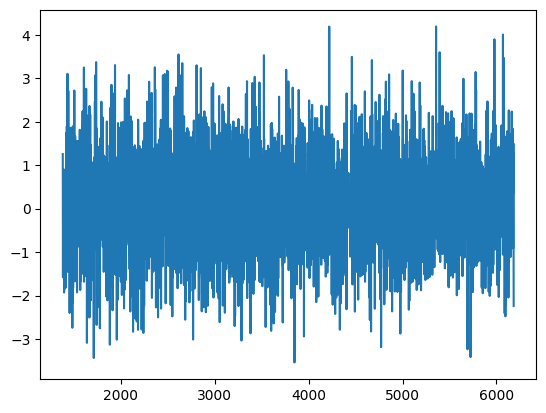

In [67]:
divSer = train/predicted_vol_series 
plt.plot(train.index, divSer, label=f'Predicted Volatility (GARCH{best_order})')
plt.show()

# GARCH RNN

In [68]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

train = divSer

# Example: assuming `train` is a Pandas Series
series = train.dropna().values.reshape(-1, 1)

# Scale data to [0,1]
scaler = MinMaxScaler()
scaled_series = scaler.fit_transform(series)

# Convert to sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 10
X, y = create_sequences(scaled_series, window_size)

# Train-test split
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(window_size, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()


history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test), verbose=1)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0314 - val_loss: 0.0148
Epoch 2/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0199 - val_loss: 0.0152
Epoch 3/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0184 - val_loss: 0.0146
Epoch 4/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0181 - val_loss: 0.0157
Epoch 5/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 0.0181 - val_loss: 0.0149
Epoch 6/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0185 - val_loss: 0.0167
Epoch 7/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0181 - val_loss: 0.0147
Epoch 8/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0174 - val_loss: 0.0148
Epoch 9/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0183 - val_loss: 0.0151
Epoch 10/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 0.0182 - val_loss: 0.0144
Epoch 11/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.0178 - val_loss: 0.0145
Epoch 12/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1m

In [71]:
# Predict
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_orig = scaler.inverse_transform(y_test)

y_post = y_pred * predicted_vol_series

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_actual, y_post))
mae = mean_absolute_error(y_actual, y_post)
directional_accuracy = (np.sign(y_actual.flatten()) == np.sign(y_post.flatten())).mean()

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"Directional Accuracy: {directional_accuracy:.2%}")


import matplotlib.pyplot as plt




plt.plot(y_actual, label='Actual')
plt.plot(y_post, label='Predicted')
plt.legend()
plt.title("Simple RNN Forecast vs Actual")
plt.show()


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step


ValueError: Length of values (958) does not match length of index (4800)